# Cell 1: Imports and Setup

In [ ]:
import os
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D # For custom legend handles
from datetime import date # For type hinting if using dates
import logging

# Configure logging (set level, format, etc.) - Basic example
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', force=True) # force=True might be needed in notebooks

# Add functions directory to path to import custom modules
# Assuming the notebook is run from the project root directory
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

import importlib
# Import the data fetching and loading functions
from functions.data_fetching.earthquake_data import fetch_and_load_earthquake_data
from functions.data_fetching.plate_data import load_plate_boundaries
from functions.data_fetching.natural_earth_downloader import load_natural_earth_data
# Import the plotting function
import functions.plotting

logging.info("Libraries and custom functions imported.")

2025-04-06 17:37:36,745 - INFO - Libraries and custom functions imported.


# Cell 2: Define Parameters

In [ ]:
# Define the minimum magnitude for earthquake data
min_eq_magnitude = 1.0

# Define target CRS (used by loading functions by default)
target_crs_epsg = "EPSG:4326"

# Define date range (optional, defaults in function are ~last year)
# Set to None if not using specific dates, otherwise define as string or date object
start_date = "2020-01-01" # Example: "2024-01-01" or date(2024, 1, 1)
end_date =  "2024-12-31"   # Example: "2024-12-31" or date(2024, 12, 31)

# Cell 3: Load Data using Functions

In [ ]:
# Load Earthquake Data
logging.info(f"Loading earthquake data (min magnitude: {min_eq_magnitude}, target CRS: {target_crs_epsg})...")
earthquake_gdf = fetch_and_load_earthquake_data(
    min_magnitude=min_eq_magnitude,
    target_crs=target_crs_epsg,
    start_date=start_date, # Pass defined start_date
    end_date=end_date      # Pass defined end_date
)
if earthquake_gdf is not None:
    logging.info(f"-> Successfully loaded {len(earthquake_gdf)} earthquakes. CRS: {earthquake_gdf.crs}")
else:
    logging.error("-> Failed to load earthquake data.")

# Load Plate Boundary Data
logging.info(f"\nLoading tectonic plate boundary data (target CRS: {target_crs_epsg})...")
plate_gdf = load_plate_boundaries(target_crs=target_crs_epsg)
if plate_gdf is not None:
    logging.info(f"-> Successfully loaded {len(plate_gdf)} plate boundary features. CRS: {plate_gdf.crs}")
else:
    logging.error("-> Failed to load plate boundary data.")

# Load Natural Earth Data
logging.info(f"\nLoading Natural Earth 50m countries and 10m lakes data (target CRS: {target_crs_epsg})...")
natural_earth_data = load_natural_earth_data(target_crs=target_crs_epsg)
ne_countries_gdf = natural_earth_data.get('countries') # Changed key and variable name
ne_lakes_gdf = natural_earth_data.get('lakes')

if ne_countries_gdf is not None:
    logging.info(f"-> Successfully loaded {len(ne_countries_gdf)} countries. CRS: {ne_countries_gdf.crs}")
else:
    logging.error("-> Failed to load Natural Earth countries.")

if ne_lakes_gdf is not None:
    logging.info(f"-> Successfully loaded {len(ne_lakes_gdf)} lakes. CRS: {ne_lakes_gdf.crs}")
else:
    logging.error("-> Failed to load Natural Earth lakes.")

2025-04-06 17:49:40,740 - INFO - Loading earthquake data (min magnitude: 1.0, target CRS: EPSG:4326)...
2025-04-06 17:49:40,742 - INFO - Processing earthquake data from 2020-01-01 to 2024-12-31 (inclusive)...
2025-04-06 17:49:40,842 - INFO - Need to download data for 916 days (using up to 10 workers)...
2025-04-06 17:51:03,537 - INFO - Finished parallel download process.
2025-04-06 17:51:03,538 - INFO - Loading daily GeoJSON files...
2025-04-06 17:53:41,704 - INFO - Concatenating data from 1827 daily files...
c:\Users\Hannah Miller Young\OneDrive\Documents\GE3250 Computational Geoscience\hannah_miller_term_project\functions\data_fetching\earthquake_data.py:219: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_gdf = pd.concat(daily_gdf

# Cell 4: Check Loaded Data

In [ ]:
# Verify if essential data for plotting was loaded successfully
can_plot_plates_eq = all(gdf is not None for gdf in [plate_gdf, earthquake_gdf])
can_plot_ne = all(gdf is not None for gdf in [ne_countries_gdf, ne_lakes_gdf]) # Basemap is optional, updated variable

if not can_plot_plates_eq:
    logging.error("Error: Cannot proceed with plotting as Plate Boundary or Earthquake data failed to load.")
else:
    logging.info("Essential data (Plates, Earthquakes) loaded successfully.")
    if not can_plot_ne:
        logging.warning("Warning: Natural Earth basemap data failed to load. Plot will be generated without basemap.")
    else:
        logging.info("Natural Earth basemap data loaded successfully.")

2025-04-06 17:38:00,645 - INFO - Essential data (Plates, Earthquakes) loaded successfully.
2025-04-06 17:38:00,646 - INFO - Natural Earth basemap data loaded successfully.


# Cell 5: Generate Plot using Function

2025-04-06 17:55:31,499 - INFO - 
Generating plot...
2025-04-06 17:55:31,525 - INFO - Plotting Natural Earth layers...
2025-04-06 17:55:31,526 - INFO - Plotting land boundaries...
2025-04-06 17:55:32,295 - INFO - Filtering lakes to top 100 by area (using original CRS area)...
2025-04-06 17:55:32,295 - INFO - Original lake CRS (WGS 84) is geographic.
2025-04-06 17:55:32,305 - INFO - Direct area calculation (degrees-squared) is unsuitable for size comparison.
2025-04-06 17:55:32,306 - INFO - Attempting temporary reprojection to EPSG:3857 (Web Mercator) for approximate area calculation.
2025-04-06 17:55:32,380 - INFO - Successfully reprojected temporarily to very roughly approximate area for ranking purposes only.
2025-04-06 17:55:32,385 - INFO - Plotting 100 largest lakes.
2025-04-06 17:55:32,713 - INFO - Plotting plate boundaries by type...
2025-04-06 17:55:33,582 - INFO - Plotted boundary types found: ['ridge' 'transform' 'trench']
2025-04-06 17:55:33,583 - INFO - Plotting earthquake d

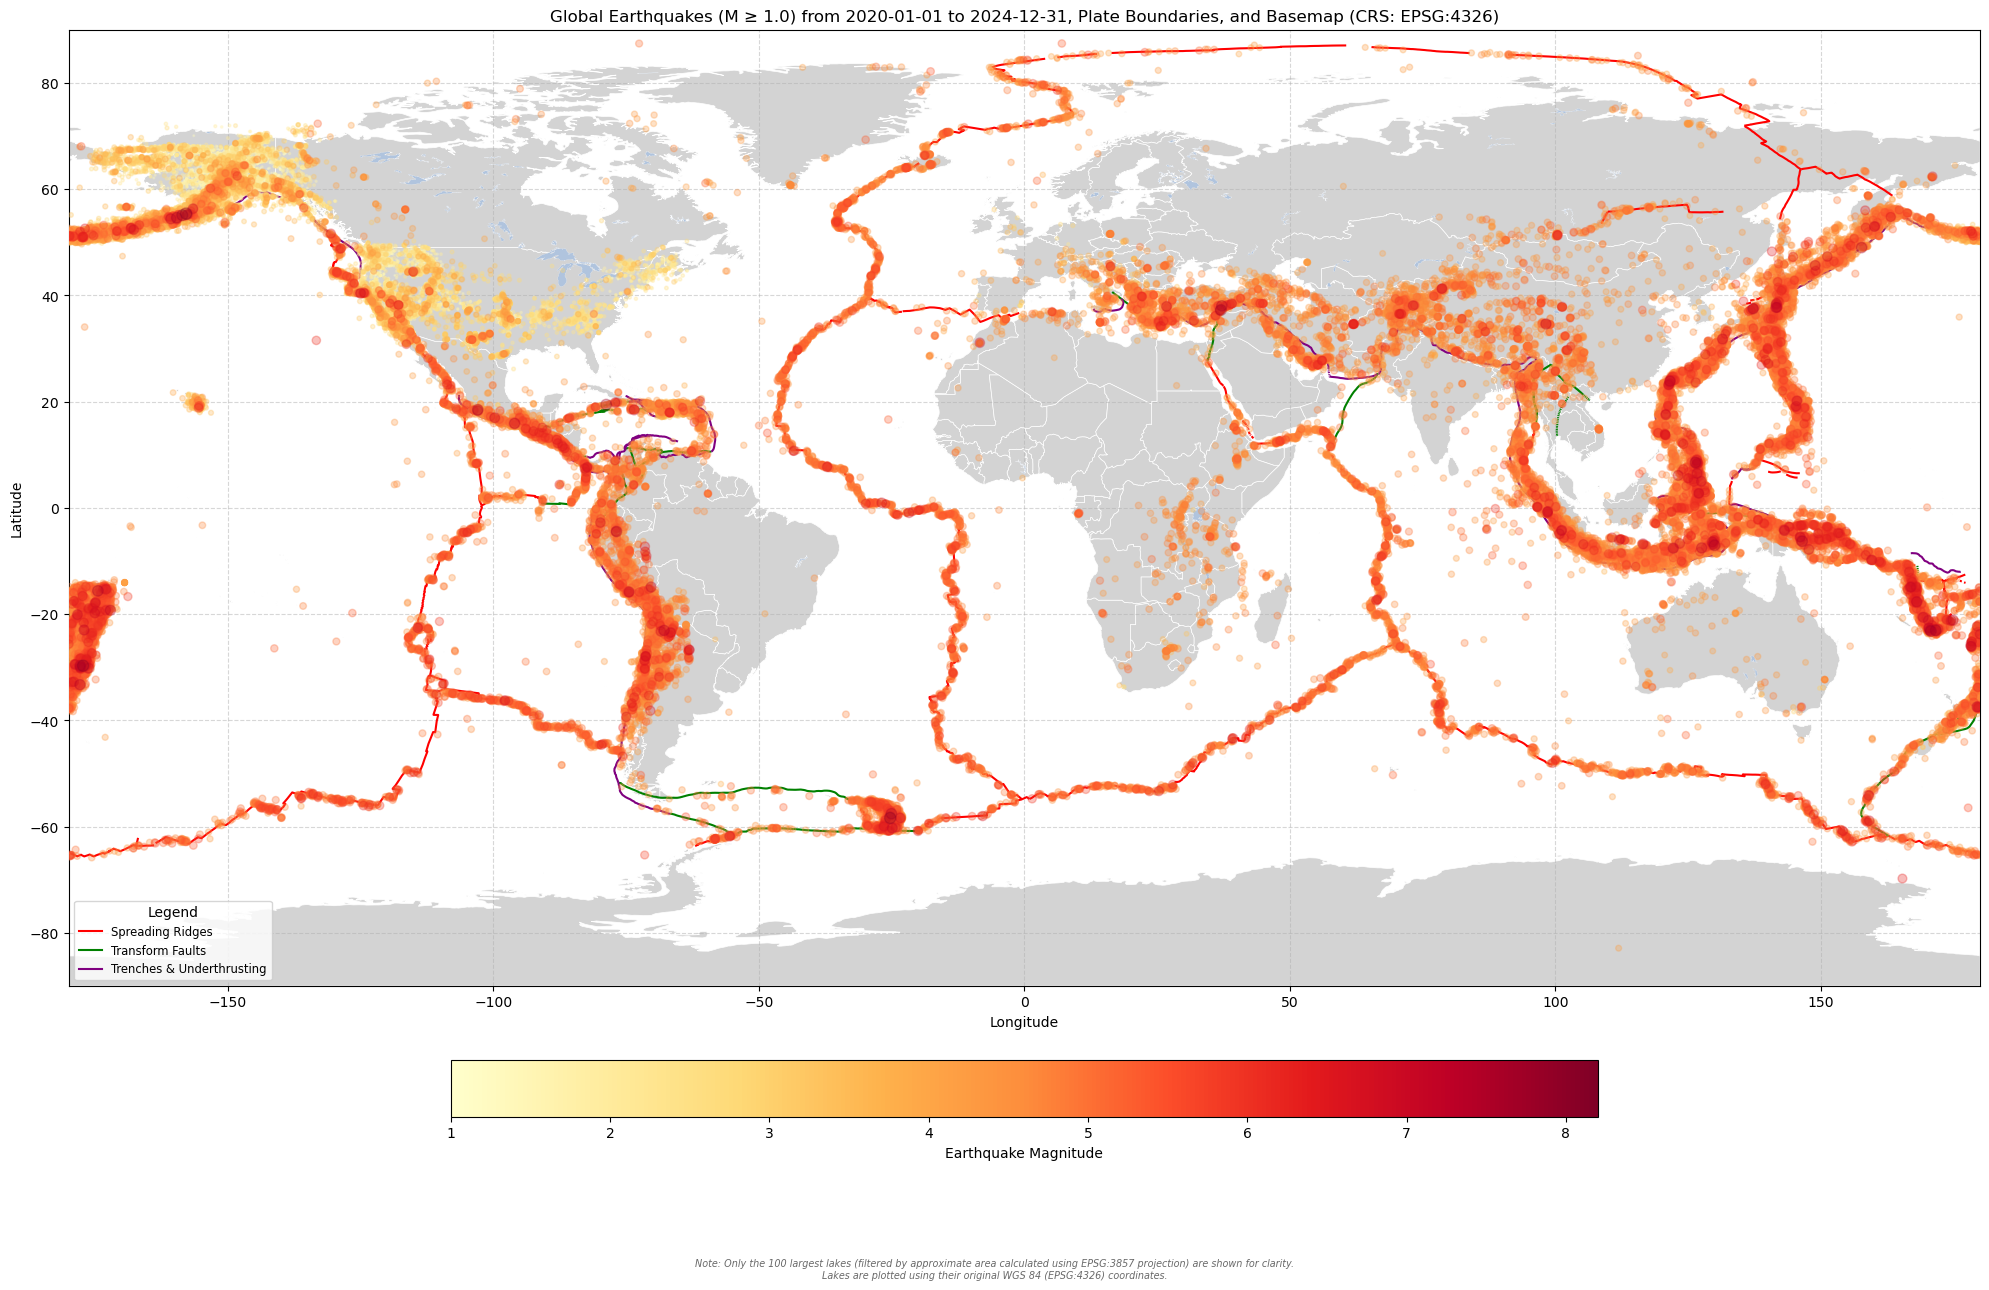

2025-04-06 17:57:03,170 - INFO - Plot displayed.


In [ ]:
importlib.reload(functions.plotting) # Using this so I can edit the plotting.py file re-import without having to restart my kernel and load all the data which takes a good deal of time.

if can_plot_plates_eq:
    functions.plotting.plot_earthquake_plate_map( # Ensure using the reloaded module
        earthquake_gdf=earthquake_gdf,
        plate_gdf=plate_gdf,
        ne_land_gdf=ne_countries_gdf, # Pass countries to the renamed parameter
        ne_lakes_gdf=ne_lakes_gdf,
        min_magnitude=min_eq_magnitude,
        start_date=start_date, # Pass the defined start_date (could be None)
        end_date=end_date,     # Pass the defined end_date (could be None)
        target_crs_epsg=target_crs_epsg
    )
else:
    logging.warning("Skipping plot generation due to data loading errors.")

In [ ]:
import importlib
import interactive_plot_widget # Import the new module
import logging

# Reload the widget module in case you make changes to it
importlib.reload(interactive_plot_widget)

# Ensure the necessary GeoDataFrames are loaded and available in your notebook's scope
# (e.g., earthquake_gdf, plate_gdf, ne_countries_gdf, ne_lakes_gdf)
# Also ensure target_crs_epsg is defined.

# Check if the essential dataframes are loaded before attempting to plot
required_gdfs = {
    "earthquake_gdf": earthquake_gdf,
    "plate_gdf": plate_gdf,
    "ne_land_gdf": ne_countries_gdf, # Make sure this matches your variable name
    "ne_lakes_gdf": ne_lakes_gdf     # Make sure this matches your variable name
}

missing_data = [name for name, gdf in required_gdfs.items() if gdf is None or gdf.empty]

if not missing_data:
    print("All required data loaded. Creating interactive plot...")
    # Call the function from the new module to create the interactive plot
    interactive_plot_widget.create_interactive_plot(
        earthquake_gdf=earthquake_gdf, # Pass the full, unfiltered earthquake data
        plate_gdf=plate_gdf,
        ne_land_gdf=ne_countries_gdf, # Use the correct variable name for land
        ne_lakes_gdf=ne_lakes_gdf,
        target_crs_epsg=target_crs_epsg # Pass your defined target CRS
    )
else:
    logging.warning(f"Skipping interactive plot generation because the following data is missing or empty: {', '.join(missing_data)}")

All required data loaded. Creating interactive plot...


Output()